In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.0f}'.format

# Data Wrangling

In [3]:
df=pd.read_csv('US_Accidents_March23.csv')

C:\Users\MacAir\AppData\Local\Temp/ipykernel_8184/3879011195.py:1: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('US_Accidents_March23.csv')


## Data Assesment

In [4]:
df.head(100)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,40,-84,NaN,NaN,0,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,40,-83,NaN,NaN,0,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39,-84,NaN,NaN,0,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,40,-84,NaN,NaN,0,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,40,-84,NaN,NaN,0,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,A-96,Source2,2,2016-02-11 07:28:16,2016-02-11 07:58:16,40,-83,NaN,NaN,0,...,False,False,False,False,False,False,Day,Day,Day,Day
96,A-97,Source2,3,2016-02-11 07:29:06,2016-02-11 08:18:10,41,-82,NaN,NaN,0,...,False,False,False,False,False,False,Day,Day,Day,Day
97,A-98,Source2,2,2016-02-11 07:53:55,2016-02-11 08:23:55,40,-84,NaN,NaN,0,...,False,False,False,False,False,False,Day,Day,Day,Day
98,A-99,Source2,2,2016-02-11 08:07:02,2016-02-11 08:37:02,40,-84,NaN,NaN,0,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.shape

(5350763, 46)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5350763 entries, 0 to 5350762
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,5350763,5350763,5350763,1948001,1948001,5350763,5248793,3631626,5242092,5263253,5236462,4898508,3497004
mean,2,36,-94,36,-94,0,62,58,65,30,9,8,0
std,0,5,17,5,18,2,19,23,23,1,3,5,0
min,1,25,-125,25,-125,0,-89,-89,1,0,0,0,0
25%,2,33,-112,33,-117,0,50,41,48,29,10,5,0
50%,2,36,-87,36,-86,0,64,62,67,30,10,7,0
75%,2,40,-80,40,-80,0,76,75,84,30,10,10,0
max,4,49,-67,49,-67,442,207,207,100,59,140,823,36


1- (Airport_Code, Wind_Chill, Weather_Timestamp,Source) will be removed as we don't need them in our analysis

2- Precipitation column should be removed as it's (Mean,First quartile,Second quartile,Third quartile) are zeros, so the column is useless

##### checking for unique values

In [8]:
columns=df.select_dtypes(include='object').columns #selecting non numerical columns
for column in columns:
    print(f'unique values in {column}: {df[column].unique()} \n')

unique values in ID: ['A-1' 'A-2' 'A-3' ... 'A-5391396' 'A-5391397' 'A-5391398'] 

unique values in Source: ['Source2' 'Source3' 'Source1'] 

unique values in Start_Time: ['2016-02-08 05:46:00' '2016-02-08 06:07:59' '2016-02-08 06:49:27' ...
 '2022-08-30 15:24:27.000000000' '2022-10-06 21:43:00.000000000'
 '2022-07-06 13:46:00.000000000'] 

unique values in End_Time: ['2016-02-08 11:00:00' '2016-02-08 06:37:59' '2016-02-08 07:19:27' ...
 '2022-08-30 18:45:14.000000000' '2022-07-06 15:01:46.000000000'
 '2022-07-13 16:28:32.000000000'] 

unique values in Description: ['Right lane blocked due to accident on I-70 Eastbound at Exit 41 OH-235 State Route 4.'
 'Accident on Brice Rd at Tussing Rd. Expect delays.'
 'Accident on OH-32 State Route 32 Westbound at Dela Palma Rd. Expect delays.'
 ... 'Incident on PULASKI RD near I-295 Drive with caution.'
 'Incident on I-25 SB near MM 70 Right lane blocked. Expect delays.'
 'Incident on OCEAN SHORE BLVD near MARLIN '] 

unique values in Street: ['I

1- The "Country" column should be removed as it contains only one unique country, so i will be useless in our analysis

2- States should be converted to full name instead of abbreviations

##### Checking for null values

In [9]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                      7790
City                         148
County                         1
State                          1
Zipcode                      915
Country                        1
Timezone                    4638
Airport_Code               13928
Weather_Timestamp          73625
Temperature(F)            101970
Wind_Chill(F)            1719137
Humidity(%)               108671
Pressure(in)               87510
Visibility(mi)            114301
Wind_Direction            106621
Wind_Speed(mph)           452255
Precipitation(in)        1853759
Weather_Condition         110748
Amenity                        1
Bump      

### Missing values
##### 
1- (End_Lat,End_Lng) columns will be removed as they contain about 70% of their values "NaN"
#####
2- (Description, Street, City, County, State, Zipcode, Country,Timezone, Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop, Astronomical_Twilight, Nautical_Twilight, Civil_Twilight, Sunrise_Sunset)

The null values in these columns will be removed as they represent a very small portion of our data and removing them will not affect our analysis
##### 
3- (Temperature,Visibility,Pressure,Humidity,Wind_Speed) : The missing values will be filled by the mean
##### 
4- (Weather_Condition,Wind_Direction) : The missing values will be filled by the mode

##### Checking for duplicate values

In [10]:
df.duplicated().any()

False

There are no duplicates

##### Checking data types

In [11]:
df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                   object
Bump      

### Data types
1- (Start_Time, End_time) should be converted to datetime datatype to apply datetime functions on them
#####
2- (Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop) should be converted to boolean datatype


## Data Cleaning

##### Removing unnecessary columns

In [12]:
df.drop(columns=['Airport_Code','Wind_Chill(F)', 'Weather_Timestamp', 'Precipitation(in)','Country','Source'],inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5350763 entries, 0 to 5350762
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Street                 object 
 11  City                   object 
 12  County                 object 
 13  State                  object 
 14  Zipcode                object 
 15  Timezone               object 
 16  Temperature(F)         float64
 17  Humidity(%)            float64
 18  Pressure(in)           float64
 19  Visibility(mi)         float64
 20  Wind_Direction         object 
 21  Wind_Speed(mph)        float64
 22  Weather_Condition 

### Convert abbreviations to full state names

In [14]:
state_map = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina',
    'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania',
    'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee',
    'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington',
    'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'
}
df['State'] = df['State'].map(state_map)

##### Null values

In [15]:
df.dropna(subset=['Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Timezone', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Astronomical_Twilight', 'Nautical_Twilight', 'Civil_Twilight', 'Sunrise_Sunset'],inplace=True)

In [16]:
df.drop(columns=['End_Lat','End_Lng','Start_Lat','Start_Lng'],inplace=True)

In [17]:
df['Humidity(%)'].fillna(df['Humidity(%)'].mean(), inplace=True)
df['Pressure(in)'].fillna(df['Pressure(in)'].mean(), inplace=True)
df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean(), inplace=True)
df['Temperature(F)'].fillna(df['Temperature(F)'].mean(), inplace=True)
df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean(), inplace=True)
df['Wind_Direction'].fillna(df['Wind_Direction'].mode()[0], inplace=True)
df['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0], inplace=True)

In [18]:
df.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Timezone                 0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64

In [19]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'],format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'],format='%Y-%m-%d %H:%M:%S', errors='coerce')

# List of columns to be converted to boolean
boolean_columns = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
    'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
]

for column in boolean_columns:
    df[column] = df[column].astype(bool)

In [20]:
df.dtypes

ID                               object
Severity                          int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Distance(mi)                    float64
Description                      object
Street                           object
City                             object
County                           object
State                            object
Zipcode                          object
Timezone                         object
Temperature(F)                  float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64
Wind_Direction                   object
Wind_Speed(mph)                 float64
Weather_Condition                object
Amenity                            bool
Bump                               bool
Crossing                           bool
Give_Way                           bool
Junction                           bool
No_Exit                            bool


# EDA

In [21]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)',
       'Description', 'Street', 'City', 'County', 'State', 'Zipcode',
       'Timezone', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

### Distribution of Traffic Accidents in the 10 Most Affected U.S. Cities

Text(0.5, 1.0, 'Top 10 US Cites by Accident Count Distribution')

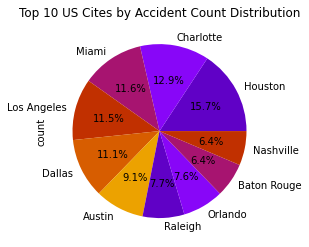

In [22]:
df['City'].value_counts().nlargest(10).plot(kind='pie',autopct='%1.1f%%',colors=sns.color_palette('gnuplot'))
plt.title('Top 10 US Cites by Accident Count Distribution')

### Distribution of Traffic Accidents in the 10 Most Affected U.S. States

Text(0, 0.5, '')

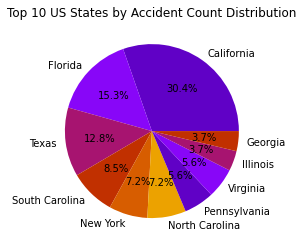

In [23]:
df['State'].value_counts().nlargest(10).plot(kind='pie',autopct='%1.1f%%',colors=sns.color_palette('gnuplot'))
plt.title('Top 10 US States by Accident Count Distribution')
plt.ylabel('')

**California** accounts for the largest proportion of accidents, with **30.4%** of the total accidents among the top 10 states

## Time Series Analysis

In [24]:
df['Year']=df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['Is_Weekend'] = df['Start_Time'].dt.dayofweek >= 5

In [25]:
df[['Year','Month','Hour','Day','Is_Weekend']].dtypes #checking data types of new columns

Year          float64
Month         float64
Hour          float64
Day           float64
Is_Weekend       bool
dtype: object

In [26]:
df['Year'] = df['Year'].fillna(0).astype('int')
df['Month'] = df['Month'].fillna(0).astype('int')
df['Hour'] = df['Hour'].fillna(0).astype('int')
df['Day'] = df['Day'].fillna(0).astype('int')

### How the number of accidents changed from 2016 to 2022 ?  
Note: I excluded 2023 from this plot because the data for 2023 only covers up to March, which means we only have data for the first three months of the year. Including this incomplete data would result in a significantly lower number of accidents for 2023 compared to the previous years, potentially misleading our analysis.

Text(0, 0.5, 'Number of Accidents')

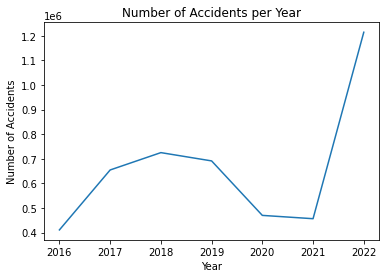

In [27]:
df[df['Year'].between(2016, 2022)].groupby('Year')['ID'].count().plot()
plt.title('Number of Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')

There is a noticeable fluctuation in accidents, with a significant peak in 2018 and a sharp increase in 2022. The drop in 2020 likely reflects the impact of COVID-19 lockdowns, which reduced travel and consequently the number of accidents.

### How the number of accidents changed over months ?

C:\Users\MacAir\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='count'>

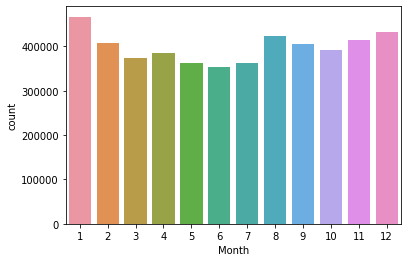

In [28]:
sns.countplot('Month',data=df[df['Month'].between(1, 12)])

**January** has the highest number of accidents, we will explore the reasons for this

### What are the top 10 weather conditions in January?

In [29]:
df_january=df[df['Month']==1]

Text(0, 0.5, 'Number of Accidents')

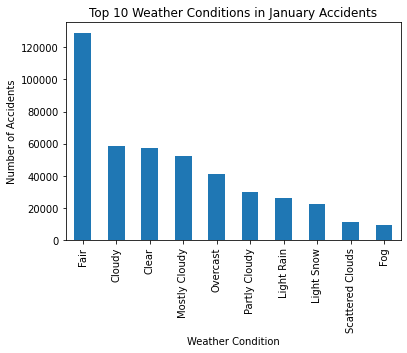

In [30]:
df_january['Weather_Condition'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Weather Conditions in January Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')

C:\Users\MacAir\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day', ylabel='count'>

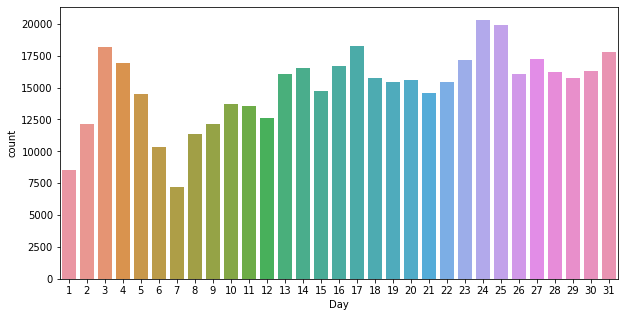

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot('Day',data=df_january)

There is a noticable peak on accidents on **January(1st)** which can be related to **New year's celebrations** and potentially increased alcohol consumption, The number of accidents tends to decrease after **January 1st**, possibly due to people recovering from New Year's celebrations and resuming normal routines.

### Phases of Natural Light in which the accidents occured in January

Text(0.5, 1.0, 'Distribution of Accidents in January by Time of Day (Sunrise,Sunset)')

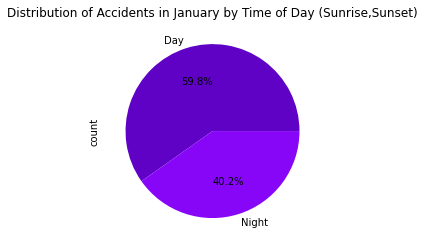

In [32]:
df_january['Sunrise_Sunset'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=sns.color_palette('gnuplot'))
plt.title('Distribution of Accidents in January by Time of Day (Sunrise,Sunset)')


Text(0.5, 1.0, 'Distribution of Accidents in January by Time of Day (Civil Twilight)')

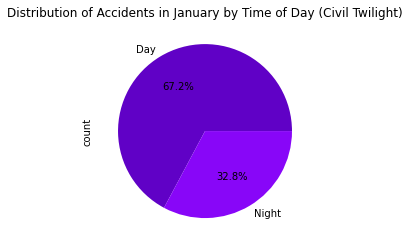

In [33]:
df_january['Civil_Twilight'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=sns.color_palette('gnuplot'))
plt.title('Distribution of Accidents in January by Time of Day (Civil Twilight)')


Text(0.5, 1.0, 'Distribution of Accidents in January by Time of Day (Nautical twilight)')

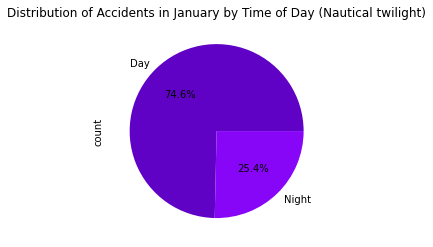

In [34]:
df_january['Nautical_Twilight'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=sns.color_palette('gnuplot'))
plt.title('Distribution of Accidents in January by Time of Day (Nautical twilight)')


Most accidents occured during day, this trend could be attributed to higher traffic volumes during the day when people are going to work or school. Daytime activities such as construction, road maintenance, and various outdoor activities can contribute to the increased number of accidents

### Exploring Correlations

Text(0.5, 1.0, 'Sorted Correlation Matrix of Accident Dataset')

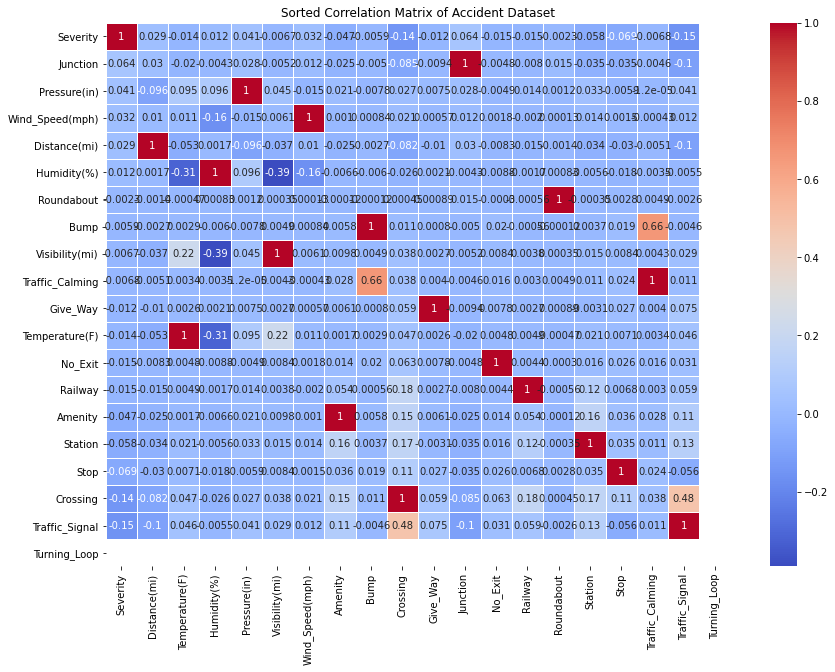

In [35]:
relevant_columns = [
    'Severity', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
    'Wind_Speed(mph)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
    'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
]

# Compute the correlation matrix with the filtered columns
corr_matrix = df[relevant_columns].corr()

# Sort the columns by correlation values for better organization
corr_matrix_sorted = corr_matrix.sort_values(by='Severity', ascending=False)

# Plot the sorted correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix_sorted, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Sorted Correlation Matrix of Accident Dataset')

The correlation matrix of the accident dataset reveals interesting relationships between different variables. For instance, there is a noticeable negative correlation between temperature and humidity, indicating that as temperature increases, humidity tends to decrease. Wind speed also shows some correlation with visibility and pressure. The presence of traffic calming measures has a notable correlation with the presence of bumps, suggesting that areas with traffic calming measures also tend to have bumps. Additionally, there are some mild correlations between the occurrence of accidents and various traffic features such as junctions and crossings. These insights help in understanding how different factors interplay in accident occurrences and can guide future safety measures and urban planning.

# Key Insights from the US Accidents Dataset Analysis
### Temporal Insights:

#### There is a noticeable fluctuation in the number of accidents across the years.
* Significant Peak: 2018

* Sharp Increase: 2022 (likely due to the impact of COVID-19 lockdowns)

#### Month with Highest Accidents: **January**
* Peak Day: January 1st (possibly due to New Year's celebrations and increased alcohol consumption)

### Geographical Insights:

**California** accounts for the largest proportion of accidents, making up 30.4% of the total among the top 10 states. This suggests regional factors influencing accident rates.

### Weather Conditions:

* Temperature and Humidity: Negative relationship observed
Wind Speed: Affects visibility and pressure, impacting driving conditions
Traffic Features:

* Traffic Calming Measures: Correlated with the presence of bumps

* Junctions and Crossings: Mild correlations with accident occurrences

### Temporal Patterns in January:

Most accidents occur during the **day**, likely due to higher traffic volumes when people are commuting or engaged in daytime activities.

### Conclusion:
These insights underscore the importance of considering temporal, geographical, weather-related, and traffic-related factors in developing effective safety measures and urban planning strategies to reduce accident occurrences.